## Desafío 03 - Estructurando un Proyecto de DS (parte I)

Gerick Toro - Comisión 46270

---

### I: Abstract
El proyecto tiene como objetivo investigar la satisfacción de los pasajeros de aerolíneas para identificar factores clave que influyan en la experiencia del cliente. El dataset seleccionado contiene diversas métricas, como edad, género, tipo de cliente, clase de vuelo, y varios parámetros de calidad de servicio (por ejemplo, limpieza, comida, y entretenimiento a bordo). Este análisis se centra en descubrir cómo estas variables afectan la satisfacción general de los pasajeros. Utilizando técnicas de visualización y análisis estadístico, el proyecto busca responder preguntas específicas como el impacto de la edad del pasajero en su satisfacción, la correlación entre retrasos de vuelo y satisfacción, y cómo varían las puntuaciones de diferentes servicios a bordo según el tipo de cliente. Los hallazgos de este estudio podrían ser valiosos para las aerolíneas que buscan mejorar la experiencia del cliente y, en última instancia, su rentabilidad.

In [1]:
# para eliminar warnings de la biblioteca seaborn
import warnings

warnings.filterwarnings("ignore")

In [2]:
# librerias que emplearemos en el analisis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# URL donde tenemos almacenados los dataframes
url = "https://raw.githubusercontent.com/gerickt/coder/main/Data/AirlinePassengerSatisfaction/airline_passenger_satisfaction.csv"
dic = "https://raw.githubusercontent.com/gerickt/coder/main/Data/AirlinePassengerSatisfaction/data_dictionary.csv"
# Construyendo los dataframes
airline_data = pd.read_csv(url, index_col=0)
data_dictionary = pd.read_csv(dic, index_col=0)

In [4]:
# Verificar la presencia de valores nulos o NaN en el dataset
missing_values = airline_data.isnull().sum()
print(missing_values)

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

In [5]:
# Rellando los nulos de "Arrial Delay" con el promedio
promedio_arrivalDelay = airline_data["Arrival Delay"].mean()
airline_data["Arrival Delay"].fillna(promedio_arrivalDelay, inplace=True)

In [6]:
# Verificamos si queda algun valor nulo en el dataframe
airline_data.isnull().sum().any()

False

In [7]:
# Resumen estadístico para identificar posibles valores atípicos
airline_data.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,38.071126,38.407410,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Preprocesamiento de outlieres

- Al parecer en las columnas de Delay (Departure y Arrival), tenemos outlieres muy grandes (mas de 1500 minutos lo cual es muy atipico).
- Según la aerolinea, lo usual es hasta 120 minutos de retraso tanto para llegadas y salidas, siendo lo optimo 0 (ontime)

In [8]:
# Trabajaremos sobre 2 variables, Retraso en salida/llegada,
retraso_salida = airline_data["Departure Delay"]
retraso_llegada = airline_data["Arrival Delay"]
print(retraso_salida.describe())
print(retraso_llegada.describe())

count    129880.000000
mean         14.713713
std          38.071126
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay, dtype: float64
count    129880.000000
mean         15.091129
std          38.407410
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay, dtype: float64


In [9]:
# creamos una función para usar el metodo IQR de detección de outlieres
def Outlier_IQR(outlier):
    primer_cuartil = outlier.quantile(0.25)
    tercer_cuartil = outlier.quantile(0.75)
    rango_intercuartilico = tercer_cuartil - primer_cuartil

    # Limites 0 para ontime y 9 para aproximarnos a los 120 minutos
    limite_inf = primer_cuartil - (0 * rango_intercuartilico)
    limite_sup = tercer_cuartil + (9 * rango_intercuartilico)
    return limite_inf, limite_sup

In [10]:
outliers_salida = Outlier_IQR(retraso_salida)
outliers_llegada = Outlier_IQR(retraso_llegada)

print(outliers_salida)
print(outliers_llegada)

(0.0, 120.0)
(0.0, 130.0)


In [11]:
# generamos una nueva columna para identificar los outlieres en Salidas
airline_data["Outlier_IQR_Departure"] = np.where(
    (airline_data["Departure Delay"] < outliers_salida[0])
    | (airline_data["Departure Delay"] > outliers_salida[1]),
    1,
    0,
)
airline_data["Outlier_IQR_Departure"].value_counts()

Outlier_IQR_Departure
0    126787
1      3093
Name: count, dtype: int64

In [12]:
# generamos una nueva columna para identificar los outlieres en Llegadas
airline_data["Outlier_IQR_Arrival"] = np.where(
    (airline_data["Arrival Delay"] < outliers_llegada[0])
    | (airline_data["Arrival Delay"] > outliers_llegada[1]),
    1,
    0,
)
airline_data["Outlier_IQR_Arrival"].value_counts()

Outlier_IQR_Arrival
0    127138
1      2742
Name: count, dtype: int64

Text(0.5, 1.0, 'Detección Outliers en salidas - Metodo IQR')

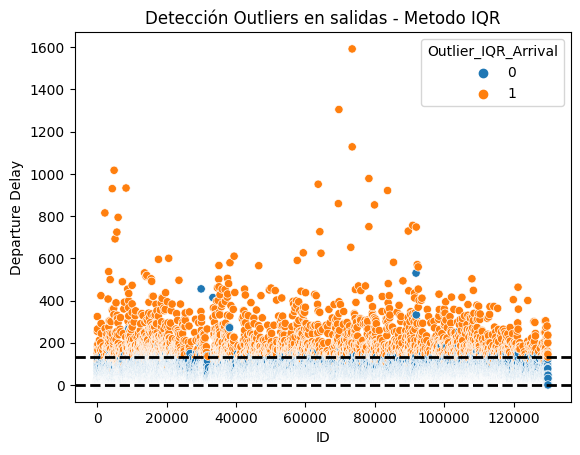

In [13]:
# Grafico de los outlieres identificados en salidas
plt.figure()
sns.scatterplot(
    data=airline_data, x="ID", y="Departure Delay", hue="Outlier_IQR_Arrival"
)
plt.axhline(
    y=outliers_llegada[0],
    color="black",
    linestyle="--",
    label="Limite Inferior",
    linewidth=2,
)
plt.axhline(
    y=outliers_llegada[1],
    color="black",
    linestyle="--",
    label="Limite Superior",
    linewidth=2,
)
plt.title("Detección Outliers en salidas - Metodo IQR")

In [14]:
# # Eliminar outliers en la columna de "Departure Delay"
filtered_airline_data = airline_data[airline_data["Outlier_IQR_Departure"] == 0]

# Eliminar outliers en la columna de "Arrival Delay"
filtered_airline_data = filtered_airline_data[airline_data["Outlier_IQR_Arrival"] == 0]

In [15]:
# Calculamos la perdida de datos despues de eliminar los outlieres
original_data_count = len(airline_data)
filtered_data_count = len(filtered_airline_data)
data_lost_percentage = (
    (original_data_count - filtered_data_count) / original_data_count
) * 100

print(f"Datos perdidos: {round(data_lost_percentage,2)}%")

Datos perdidos: 2.56%


Text(0.5, 1.0, 'Detección Outliers en salidas - Metodo IQR')

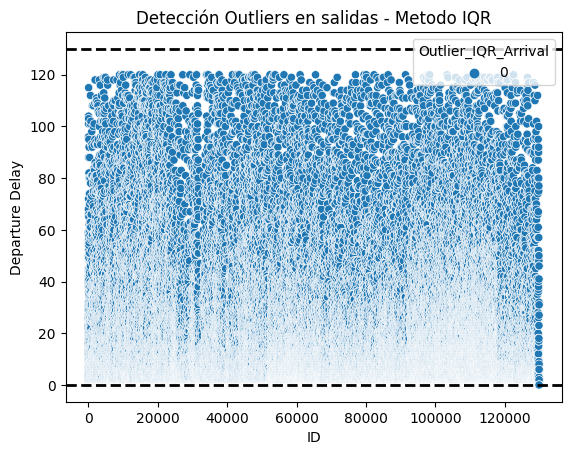

In [16]:
# Grafico sin outlieres
plt.figure()
sns.scatterplot(
    data=filtered_airline_data, x="ID", y="Departure Delay", hue="Outlier_IQR_Arrival"
)
plt.axhline(
    y=outliers_llegada[0],
    color="black",
    linestyle="--",
    label="Limite Inferior",
    linewidth=2,
)
plt.axhline(
    y=outliers_llegada[1],
    color="black",
    linestyle="--",
    label="Limite Superior",
    linewidth=2,
)
plt.title("Detección Outliers en salidas - Metodo IQR")

In [17]:
# Consideramos el porcentaje bastante bajo, por lo que no impactaría al modelo para nuestro analisis
# actualizamos el dataframe con los valores filtrados:

airline_data = filtered_airline_data

---
### II: Hipótesis - Los pasajeros más jóvenes son más críticos y, por lo tanto, menos propensos a estar satisfechos que los pasajeros mayores.
*¿La edad del pasajero afecta su nivel de satisfacción general?*

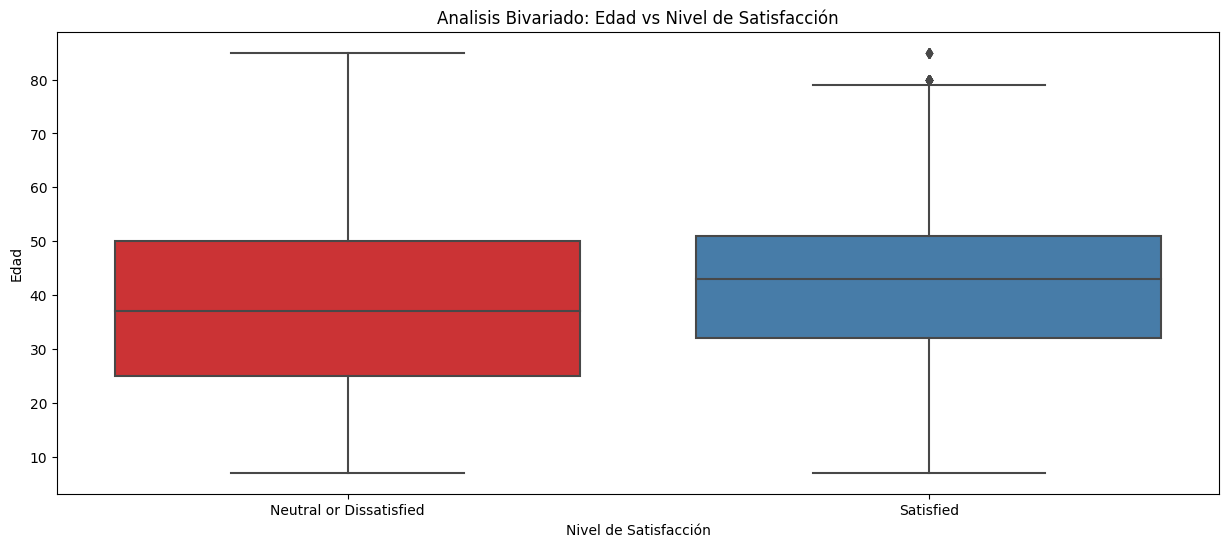

In [18]:
# Para esta primera hipótesis, usaremos un analisis bivariado: Edad y Nivel de satisfacción
plt.figure(figsize=(15, 6))
sns.boxplot(x="Satisfaction", y="Age", data=airline_data, palette="Set1")
plt.title("Analisis Bivariado: Edad vs Nivel de Satisfacción")
plt.xlabel("Nivel de Satisfacción")
plt.ylabel("Edad")
plt.show()

#### Análisis Bivariado: Edad vs Nivel de Satisfacción
Como se ´puede ver en el boxplot, la distribución de las edades es bastante similar para ambos niveles de satisfacción ("Neutral or Dissatisfied" y "Satisfied"). Sin embargo, hay algunas diferencias menores. Por ejemplo, la mediana de la edad para los pasajeros "satisfechos" es ligeramente más alta que para los "neutral o insatisfechos".

La hipótesis de que los pasajeros más jóvenes son menos propensos a estar satisfechos no parece sostenerse en este caso. Las edades están bastante distribuidas en ambos grupos de satisfacción, lo que sugiere que **la edad no es un factor crítico para determinar la satisfacción del pasajero.**

In [19]:
# Emplearemos la libreria statsmodels para verificar el grafico usando un modelo de regersion lineal simple
import statsmodels.formula.api as sm

In [20]:
# primero necesitamos transformar la variable categoria de Satisfaction a 0 y 1
airline_data["Satisfaction_encoded"] = airline_data["Satisfaction"].map(
    {"Neutral or Dissatisfied": 0, "Satisfied": 1}
)

In [21]:
model1 = "Age ~ Satisfaction_encoded"
lm1 = sm.ols(formula=model1, data=airline_data).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2302.
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:51:32   Log-Likelihood:            -5.2212e+05
No. Observations:              126551   AIC:                         1.044e+06
Df Residuals:                  126549   BIC:                         1.044e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               37.6614      0.056    671.309      0.000      37.551      37.771
Satisfaction_encoded     4.0746      0.085     47.984      0.000       3.908       4.241
==============================================================================
Omnibus:                     4801.655   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2227.893
Skew:                           0.091   Prob(JB):                         0.00
Kurtosis:                       2.376   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Regresión Lineal Simple: Edad vs Nivel de Satisfacción
La regresión lineal simple utilizando el método de mínimos cuadrados, resultados:

- *R2 (Coeficiente de determinación):* El valor es muy bajo (0.018), lo que indica que el modelo no explica bien la variabilidad en la satisfacción del cliente en función de la edad.
- *P-valor:* Es menor que 0.05 para la variable de edad, lo que significa que la edad es un predictor significativo, pero no necesariamente un buen predictor dado el bajo R2.

Si bien la edad parece tener un efecto significativo en la satisfacción según la regresión lineal, el modelo en sí mismo no es muy explicativo (R2 bajo). 

Por lo tanto, confirmamos nuestro análisis anterior: **la edad no es un factor crítico para determinar la satisfacción del pasajero.**

---
### III: Hipótesis - Los retrasos significativos en la llegada o salida disminuirán considerablemente la satisfacción del cliente.
*¿Los retrasos en la llegada y salida tienen un impacto significativo en la satisfacción del cliente?*

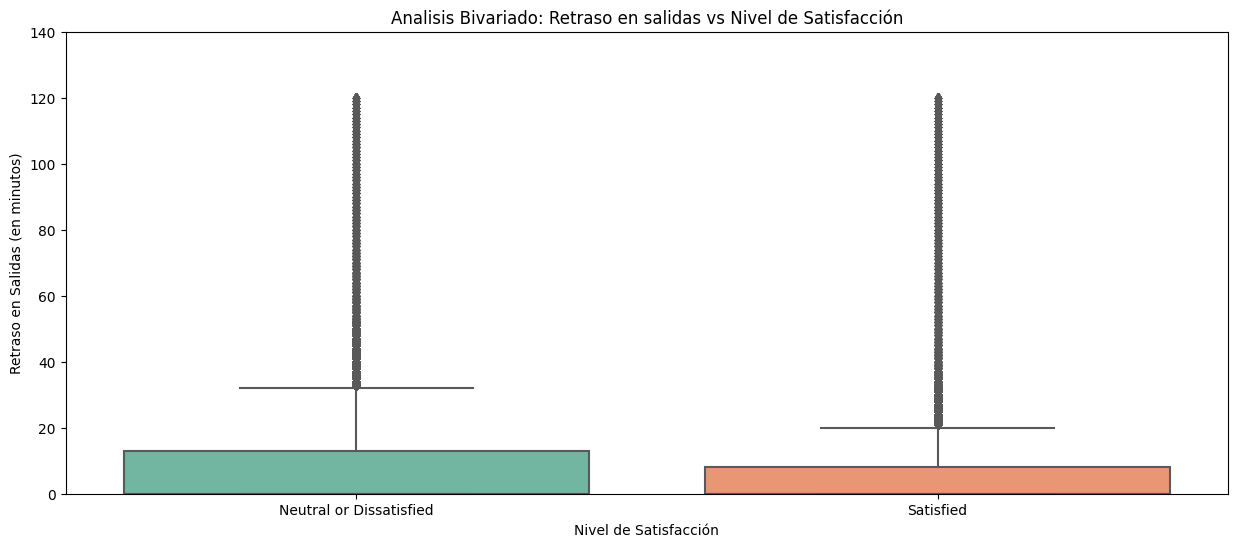

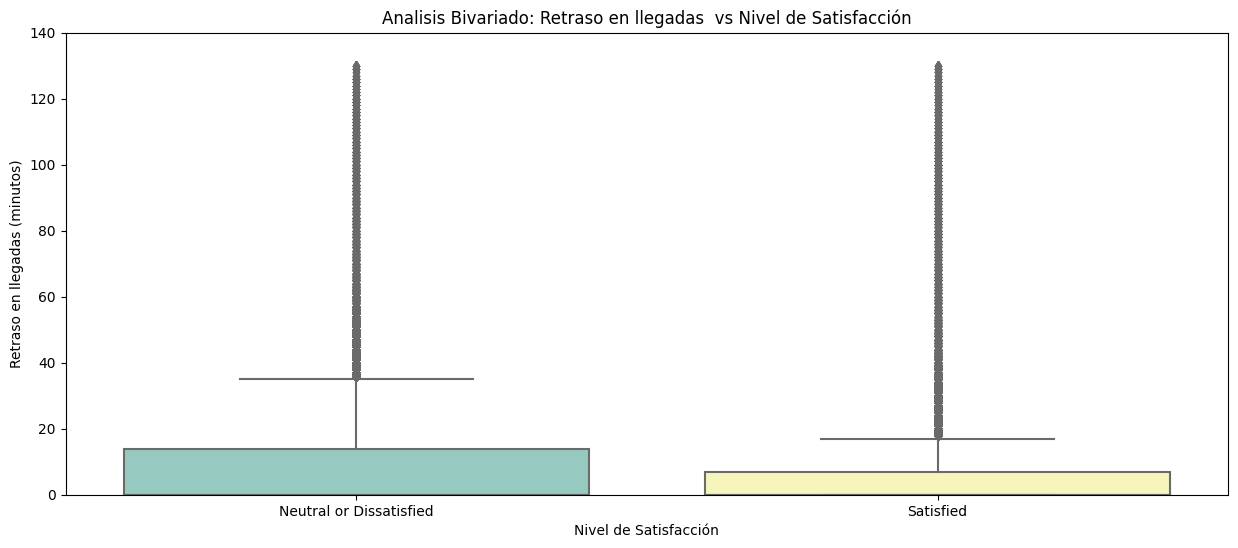

In [22]:
# Plot Salidas
plt.figure(figsize=(15, 6))
sns.boxplot(x="Satisfaction", y="Departure Delay", data=airline_data, palette="Set2")
plt.title("Analisis Bivariado: Retraso en salidas vs Nivel de Satisfacción")
plt.xlabel("Nivel de Satisfacción")
plt.ylabel("Retraso en Salidas (en minutos)")
plt.ylim(0, 140)
plt.show()

# Plot Llegadas
plt.figure(figsize=(15, 6))
sns.boxplot(x="Satisfaction", y="Arrival Delay", data=airline_data, palette="Set3")
plt.title("Analisis Bivariado: Retraso en llegadas  vs Nivel de Satisfacción")
plt.xlabel("Nivel de Satisfacción")
plt.ylabel("Retraso en llegadas (minutos)")
plt.ylim(0, 140)
plt.show()

#### Análisis Bivariado: Retrasos (Salida y Llegada) vs Nivel de Satisfacción (Datos Filtrados)
- Retraso en la Salida: La mayoría de los vuelos tienen retrasos menores (menos de 20 minutos), y la distribución parece similar para ambos niveles de satisfacción.
- Retraso en la Llegada: Similar a los retrasos en la salida, la mayoría de los vuelos tienen retrasos menores, y la distribución es similar en ambos grupos de satisfacción.

Esta visualización en una escala más pequeña confirma nuestras observaciones anteriores. Aunque hay retrasos, no parecen ser un factor crítico en la satisfacción del cliente.

In [23]:
model2 = "Satisfaction_encoded ~ Q('Departure Delay') + Q('Arrival Delay')"
lm2 = sm.ols(formula=model2, data=airline_data).fit()
print(lm2.summary())

                             OLS Regression Results                             
Dep. Variable:     Satisfaction_encoded   R-squared:                       0.006
Model:                              OLS   Adj. R-squared:                  0.006
Method:                   Least Squares   F-statistic:                     382.2
Date:                  Wed, 27 Sep 2023   Prob (F-statistic):          3.17e-166
Time:                          15:51:40   Log-Likelihood:                -90439.
No. Observations:                126551   AIC:                         1.809e+05
Df Residuals:                    126548   BIC:                         1.809e+05
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept   

#### Regresión Lineal Multiple
**Departures**
- R2 es muy bajo, 0.006, lo que indica que la relación  en los retrasos afecta muy poco a la satisfacción del cliente.

Estos resultados, una vez más, confirman nuestras observaciones iniciales de los boxplots: aunque hay una relación estadísticamente significativa, la magnitud del efecto es muy pequeña. 

En resumen, los retrasos, ya sea en la salida o en la llegada, **no parecen tener un impacto significativo en la satisfacción del cliente.**

---
### IV: Hipótesis - Los pasajeros en clases superiores (como Business) tendrán niveles más altos de satisfacción en comparación con los de clases económicas.
*¿Las clases de vuelo (Económica, Business, etc.) afectan los niveles de satisfacción?*

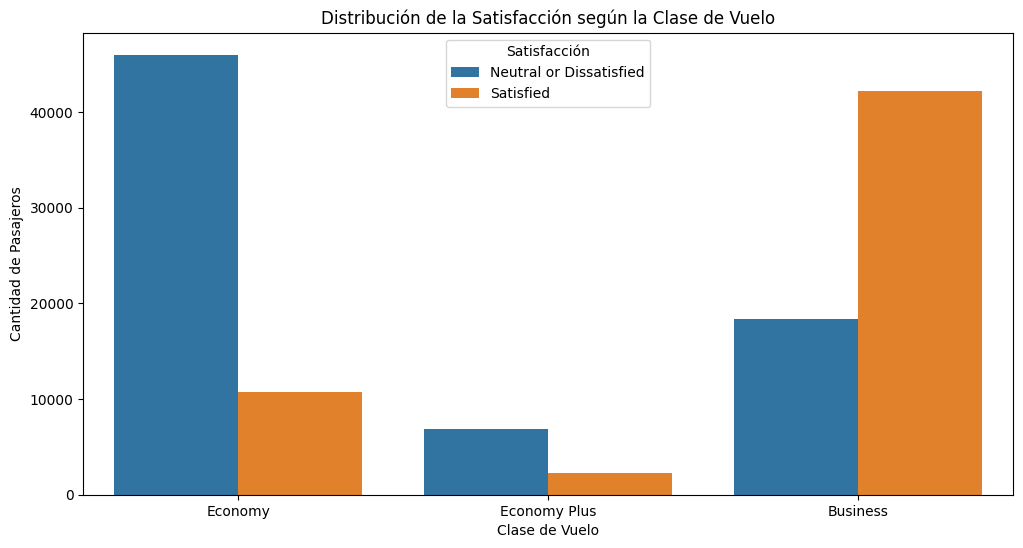

In [24]:
# Vamos a crear un gráfico de barras para ver cómo varía la satisfacción según la clase de vuelo.

plt.figure(figsize=(12, 6))
sns.countplot(
    x="Class",
    hue="Satisfaction",
    data=airline_data,
    order=["Economy", "Economy Plus", "Business"],
)
plt.title("Distribución de la Satisfacción según la Clase de Vuelo")
plt.xlabel("Clase de Vuelo")
plt.ylabel("Cantidad de Pasajeros")
plt.legend(title="Satisfacción", loc="upper center")
plt.show()

#### Análisis Bivariado: Clase del vuelo vs Nivel de Satisfacción
- En la clase Economy, hay más pasajeros insatisfechos que satisfechos.
- En la clase Economy Plus, la distribución parece un poco más equilibrada.
- En la clase Business, la mayoría de los pasajeros están satisfechos.

Este gráfico parece respaldar la hipótesis de que las clases superiores tienden a tener pasajeros más satisfechos.

In [25]:
# Codificar la columna 'Class' para su uso en el modelo OLS
airline_data["Class_encoded"] = airline_data["Class"].map(
    {"Economy": 1, "Economy Plus": 2, "Business": 3}
)

In [26]:
# Aplicar un modelo de regresión lineal simple usando OLS para la clase de vuelo
model3 = "Satisfaction_encoded ~ Class_encoded"
lm3 = sm.ols(formula=model3, data=airline_data).fit()
# Resumen del modelo
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Satisfaction_encoded   R-squared:                       0.243
Model:                              OLS   Adj. R-squared:                  0.243
Method:                   Least Squares   F-statistic:                 4.071e+04
Date:                  Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                          15:51:55   Log-Likelihood:                -73171.
No. Observations:                126551   AIC:                         1.463e+05
Df Residuals:                    126549   BIC:                         1.464e+05
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0797      0.003    -28.165      0.000      -0.085      -0.074
Class_encoded     0.2542      0.001    201.775      0.000       0.252       0.257
==============================================================================
Omnibus:                     8162.315   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3119.626
Skew:                           0.114   Prob(JB):                         0.00
Kurtosis:                       2.265   Cond. No.                         6.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Regresión Lineal Simple: Clase vs Nivel de Satisfacción
La regresión lineal simple utilizando el método de mínimos cuadrados, resultados:

- *R2 (Coeficiente de determinación):* El valor es de 0.243, bastante mas significativo que las variables anterior analizadas.
- *P-valor:* Es positivo (0.2542) y estadísticamente significativo (p-valor cercano a 0). Esto sugiere que a medida que se pasa de Economy a Business, la probabilidad de estar satisfecho aumenta,

Por lo tanto, confirmamos nuestro análisis anterior: **la clase impacta levemente en la satisfacción del cliente.**